DAMA_61 WRITTEN ASSIGNMENT 1 

## Problem 1

Import the appropriate libraries to start with.

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import zipfile
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score


### 1)

We download the wines dataset and load the data of the “red” wines as a dataframe named red_wine.

We use the sep=';' to correctly show the data, as the csv file not uses the default seperator (',').

In [3]:
#red_wine = pd.read_csv(r"C:\Users\tasos\Desktop\ΕΑΠ\DAMA61\HW assignments DAMA_61_2024_25\WA1_61\wine+quality\winequality-red.csv", sep =';')

In [4]:
def load_wine_data():
    zip_path = Path("wine_data/wine_quality.zip")
        
    if not zip_path.is_file():
        Path("wine_data").mkdir(parents=True, exist_ok=True)
        url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
        urllib.request.urlretrieve(url, zip_path)
        
        with zipfile.ZipFile(zip_path, "r") as wine_zip:
            wine_zip.extractall(path= "wine_data" )    
    
    red_wine = pd.read_csv(Path("wine_data") / "winequality-red.csv", sep=";")
    white_wine = pd.read_csv(Path("wine_data") / "winequality-white.csv", sep=";")
    
    return red_wine, white_wine

In [5]:
red_wine, white_wine = load_wine_data()

### 2)

We use the head() method to show the first lines of data frame.


In [24]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


As we observe the data, we see that the features describing the quality of the data are the first 11:

In [12]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide',
'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol'

### 3)

We use the info() method to get a quick description of the data: Total number of rows, each attribute’s type, and the number of non-null values.

In [14]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We see that there are no missing values in the red_wine data frame. The total entries are 1599 and has 12 columns: 11 of type float and one of type integer.

We also use the describe method to get a summary of the attributes

In [15]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 4)

We form the histograms of the features.

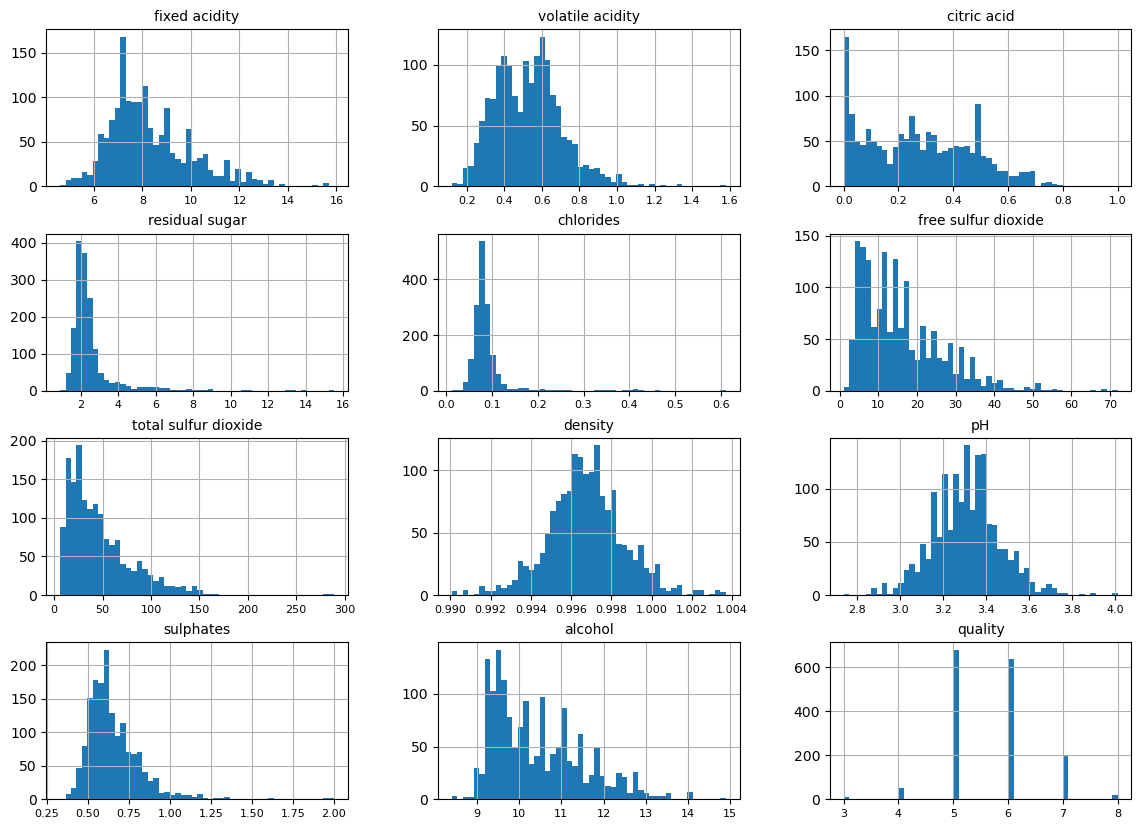

In [16]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=10)

red_wine.hist(bins=50, figsize=(14, 10))
plt.show()

We can see that the distribution of some  features('fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates'and 'alcohol' can be improved as they are tailed to the right(right skewed). This can be achieved by transforming them to shrink the heavy tail, and if possible to make the distribution roughly symmetrical. A common way to do this for positive features with a heavy tail to the right(our case) is to replace the feature with its square root (or raise the feature to a power between 0 and 1). If the feature has a really long and heavy tail, such as a power law distribution, then replacing the feature with its logarithm may help, but this isn't the case for our features.

For multimodal distribution as the 'volatile acidity', we can bucketize it(treating the bucket IDs as categories, rather than as numerical values) and use OneHotEncoder to encode it, or add a feature for each of the modes(at least the main ones: 0.4, 0.6 in our case), representing the similarity between volatile acidity and that particular mode. The similarity measure is typically computed using a radial basis function (RBF)—any function that depends only on the distance between the input value and a fixed point. In our case we would be using the Gaussian RBF, whose output value decays exponentially as the input value moves away from the fixed point.

### 5)

We compute the compute the Standard correlation coefficient(Pearson's) and see how much each attribute correlates with the 'quality'.

In [17]:
corr_matrix = red_wine.corr()

In [18]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation. When closer to -1 there is a strong negative corelation and when it's around 0, means that there is no correlation.

We observe that 'alcohol' is positive moderate correlated to 'quality', and it's the attribute that seems to affect the 'quality' more. 'Sulphates' and 'citric acid' are also positive corelated to quality but the corelation is weak. Moderate also, but negative corelation we can see with the 'volatile acidity' attribute, and weak negative corelation we can observe with the 'total sulfur dioxide' and the 'density' attributes.

The attributes that affect the quality less, either negative or positive corelation, are 'fixed acidity', 'residual sugar', 'free sulfur dioxide', 'pH', and 'chlorides'.

### 6)

We will split the dataset into a training and a testing set retaining 80% and 20% of the total number of samples,
respectively, using random shuffling and splitting that retains the statistical properties of the input data
(stratified) with respect to quality

In [11]:
strat_train_set, strat_test_set = train_test_split( red_wine, test_size=0.2, 
                                                   stratify=red_wine['quality'], random_state=42)

We check the  different qualities proportions at the test set, the train set and also at the whole red_wine data set.

In [12]:
strat_test_set['quality'].value_counts() / len(strat_test_set)

quality
5    0.425000
6    0.400000
7    0.125000
4    0.034375
8    0.009375
3    0.006250
Name: count, dtype: float64

In [13]:
strat_train_set['quality'].value_counts() / len(strat_train_set)

quality
5    0.426114
6    0.398749
7    0.124316
4    0.032838
8    0.011728
3    0.006255
Name: count, dtype: float64

In [14]:
red_wine['quality'].value_counts()/len(red_wine)


quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: count, dtype: float64

In [15]:

def red_wine_proportions(data):
    return data['quality'].value_counts() / len(data)

train_set, test_set = train_test_split(red_wine, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": red_wine_proportions(red_wine),
    "Stratified %": red_wine_proportions(strat_test_set),
    "Random %": red_wine_proportions(test_set),
}).sort_index()
compare_props.index.name = "quality"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
quality,,,,,
3,0.63,0.62,0.31,-0.06,-50.03
4,3.31,3.44,3.12,3.71,-5.72
5,42.59,42.50,40.62,-0.21,-4.61
6,39.90,40.00,41.25,0.25,3.38
7,12.45,12.50,13.12,0.44,5.46
8,1.13,0.94,1.56,-16.72,38.80


We can see that through stratification the proportions kept almost identical on the above sets.

### 7)

We set the predictors and the target value(quality) to use them on the model.

In [16]:
red_wine_train_str_preds = strat_train_set.drop('quality', axis=1)
red_wine_train_str_labels = strat_train_set['quality'].copy()

We do the same for the test set

In [17]:
red_wine_test_str_preds = strat_test_set.drop('quality', axis=1)
red_wine_test_str_labels = strat_test_set['quality'].copy()

We scale the data with a Standard scaler. 

In [18]:
std_preds = StandardScaler()
red_wine_train_str_preds_scaled = std_preds.fit_transform(red_wine_train_str_preds)

We do the same for the test set

In [19]:
red_wine_test_str_preds_scaled = std_preds.transform(red_wine_test_str_preds)


And we apply the Linear Regression model. We first feed the training data.

In [20]:
linr = LinearRegression()
linr.fit(red_wine_train_str_preds_scaled,red_wine_train_str_labels)

LinearRegression()

And we make predictions using the test data's predictors.

In [21]:
predictions = linr.predict(red_wine_test_str_preds_scaled)

Finally, we evaluate the performance with different metrics.

In [22]:
#R2 score metric 
linr_r2_score = r2_score(red_wine_test_str_labels,predictions)
print('The r2 score is:', linr_r2_score)

The r2 score is: 0.3702504549078959


In [23]:
#Mean absolute error metric
linr_mae = mean_absolute_error(red_wine_test_str_labels,predictions)
linr_mae
print('The mean absolute error is:', linr_mae)

The mean absolute error is: 0.495119032170256


In [24]:
#Mean absolute percentage error metric
linr_mape = mean_absolute_percentage_error(red_wine_test_str_labels,predictions)
linr_mape
print('The mean absolute percentage error is:', linr_mape)

The mean absolute percentage error is: 0.09107360241872611


In [25]:
#Mean squared error metric
linr_mse = mean_squared_error(red_wine_test_str_labels,predictions)
linr_mse
print('The mean squared error is:', linr_mse)

The mean squared error is: 0.40636065372564334


Since Accuracy is used for Classification and not for regression we won't be computing it.

We plot the Actuals vs Predicted diagram using a scatter plot along with the Regression line.

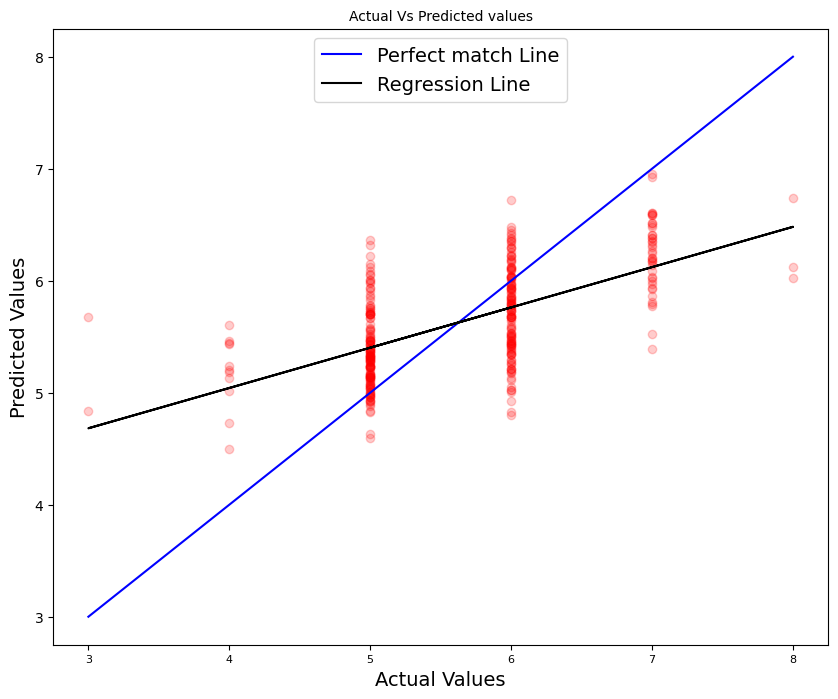

In [26]:
plt.figure(figsize=(10,8))
#plt.scatter(red_wine_test_str_labels_scaled,scaled_predictions, alpha=0.1)
plt.scatter(red_wine_test_str_labels,predictions, color='red',alpha=0.2)
x = np.linspace(min(red_wine_test_str_labels), max(red_wine_test_str_labels),1000)
plt.plot(x, x, color='blue', label='Perfect match Line')  # The line of the perfect match of Actual and Predicted values

m, b = np.polyfit(red_wine_test_str_labels, predictions, 1)
plt.plot(red_wine_test_str_labels, m * red_wine_test_str_labels + b, color="black", label="Regression Line")
leg = plt.legend(loc='upper center')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Vs Predicted values')
plt.show()

What we see is that the model is more accurate from 5 to 6 quality values. That behavior mostly comes from the luck of data for the other values. 

### 8)

We will perform 10-fold cross validation and compute the mean and standard deviation of the scores over the folds.

In [27]:
linr_cv_scores = cross_val_score(linr, red_wine_train_str_preds_scaled,red_wine_train_str_labels, scoring= 'r2', cv = 10)

In [28]:
pd.Series(linr_cv_scores).describe()

count    10.000000
mean      0.338231
std       0.076265
min       0.200522
25%       0.315664
50%       0.356760
75%       0.384798
max       0.448132
dtype: float64

In [29]:
print('The r2 score is:', linr_r2_score)

The r2 score is: 0.3702504549078959


As we can see the r2 score computed from our model is within the range(mean + std values) of the r2 score computed with the cross validation.

## Problem 2

Import the appropriate libraries to start with.

In [30]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix



### 1)

We use fetch_openml to fetch the MNIST dataset from OpenML.org

In [31]:
mnist = fetch_openml('mnist_784', as_frame=False)

We explore the generated datasets a bit, just to confirm that are NumPy arrays and their shape and the type of their context.

In [32]:
X,y = mnist.data, mnist.target

In [33]:
X.shape, y.shape, type(X[0]),type(y[0])

((70000, 784), (70000,), numpy.ndarray, str)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 42)

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59500, 784), (59500,), (10500, 784), (10500,))

In [36]:
len(X)*0.85, len(X)*0.15

(59500.0, 10500.0)

We can confirm that all the classes have the adequate number of instances. 

### 2)

With the help of the plot_digit function, we depict the first 8 images of the created training and test sets using different subplots in a 2 by 4 frame, with their labels as titles.

In [37]:
def plot_digit(image_data):
 image = image_data.reshape(28, 28)
 plt.imshow(image, cmap="binary")
 plt.axis("off")


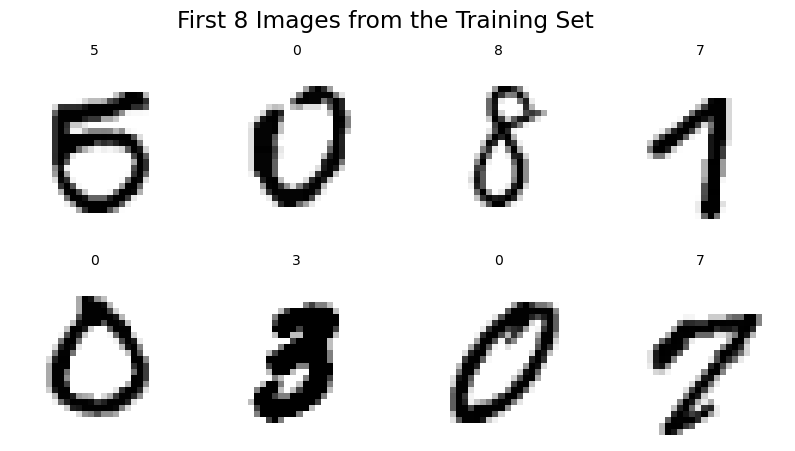

In [38]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
fig.suptitle("First 8 Images from the Training Set")

for i in range(8):
    plt.subplot(2, 4, i+1)
    plot_digit(X_train[i])
    plt.title(y_train[i])

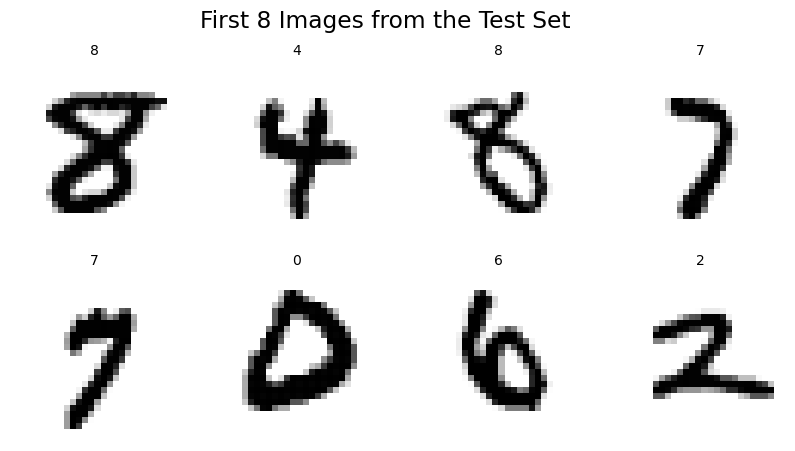

In [39]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
fig.suptitle("First 8 Images from the Test Set")

for i in range(8):
    plt.subplot(2, 4, i+1)
    plot_digit(X_test[i])
    plt.title(y_test[i]) 

### 3)

We have already created the test and train subsets previously with a training size of 59500 and a test size of 10500 instances. 'X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 42)'

Since this is a classification problem of distinguishing between two classes: even and odd numbers, we will first create the target vectors for this classification task. To achieve this, we will turn y_train and y_test from string type to integers to allow us do the computations.

In [40]:
y_train_int = y_train.astype(int) 
y_test_int = y_test.astype(int)

y_train_even = (y_train_int%2 == 0) # True for all even numbers, False for all other digits
y_test_even = (y_test_int%2 == 0)
print(type(y_train_even), y_train_even.shape, y_train_even[:10])
print(type(y_test_even), y_test_even.shape, y_test_even[:10])

<class 'numpy.ndarray'> (59500,) [False  True  True False  True False  True False  True  True]
<class 'numpy.ndarray'> (10500,) [ True  True  True False False  True  True  True False  True]


We create an Stohastic Gradient binary classifier (SGDClassifier) and train it on the whole training set.

In [72]:
sgd_clf = SGDClassifier(random_state=42)


In [73]:
sgd_clf.fit(X_train, y_train_even)

SGDClassifier(random_state=42)

Check if working

In [42]:
some_digit = X_test[3]
check = sgd_clf.predict([some_digit])
print(y_test[3], check)

7 [False]


We will use the MinMaxScaler as a normalization technique.

In [43]:
min_max_scaler = MinMaxScaler()
#stdScaler = StandardScaler()

We introduce our pipeline 

In [77]:
sgdc_pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('sgd_clf', SGDClassifier(random_state=42))
])

# sgdc_pipeline = Pipeline([
#     ('std_scaler', StandardScaler()),
#     ('sgd_clf', SGDClassifier(random_state=42))
# ])

We use the pipeline to fit the training data.

In [78]:
X_train_prepared = sgdc_pipeline.fit(X_train,y_train_even)


In [74]:
X_train_prepared

Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                ('sgd_clf', SGDClassifier(random_state=42))])

And use the pipeline to predict on test data

In [81]:
sgd_preds = sgdc_pipeline.predict(X_test)
sgd_preds[:8]

array([ True, False,  True, False, False,  True,  True,  True])

We observe that only the second value is predicted faulty.

### 4)

We use 3-fold cross validation and evaluate your classification pipeline by calculating the next metrics: accuracy, recall, and precision. 

In [47]:
cv_sgdc_accuracy = cross_val_score(sgdc_pipeline, X_train, y_train_even, cv=3, scoring='accuracy')
print('Cross validation accuracy scores:', cv_sgdc_accuracy)

Cross validation accuracy scores: [0.8957346  0.89204861 0.89956134]


In [48]:
cv_sgdc_precision = cross_val_score(sgdc_pipeline, X_train, y_train_even, cv=3, scoring='precision')
print('Cross validation precision scores:', cv_sgdc_precision)

Cross validation precision scores: [0.90244919 0.93083249 0.8897441 ]


In [49]:
cv_sgdc_recall = cross_val_score(sgdc_pipeline, X_train, y_train_even, cv=3, scoring='recall')
print('Cross validation recall scores:', cv_sgdc_recall)

Cross validation recall scores: [0.88438362 0.84402451 0.90919305]


We introduce  a dummy model that always guesses that an image belongs to the even category to compare it with our model.

In [50]:
dummy_clf = DummyClassifier(strategy="constant", constant=True)
dummy_clf.fit(X_train, y_train_even)
dummy_clf_predictions = dummy_clf.predict(X_test)
print(dummy_clf_predictions[:20])


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


And we evaluate it with the same metrics as above(accuracy, precision, recall)

In [51]:
dummy_clf_accuracy = cross_val_score(dummy_clf, X_train, y_train_even, cv=3, scoring='accuracy')
print('dummy_clf cross validation accuracy scores:', dummy_clf_accuracy)

dummy_clf cross validation accuracy scores: [0.49364727 0.49362174 0.49362174]


In [52]:
dummy_clf_precision = cross_val_score(dummy_clf, X_train, y_train_even, cv=3, scoring='precision')
print('dummy_clf cross validation precision scores:', dummy_clf_precision)

dummy_clf cross validation precision scores: [0.49364727 0.49362174 0.49362174]


In [53]:
dummy_clf_recall = cross_val_score(dummy_clf, X_train, y_train_even, cv=3, scoring='recall')
print('dummy_clf cross validation recall scores:', dummy_clf_recall)

dummy_clf cross validation recall scores: [1. 1. 1.]


We can observe that the accuracy and recall metrics are better on our model. The recall = 1 alone doesn't say anything, and is the value we expected as it's predicting all the even numbers correctly and never predicts a FN instance.

### 5)

We calculate the confusion matrix for the training set, following the same 3-fold cross validation protocol.

In [54]:
y_train_cv_predictions = cross_val_predict(sgdc_pipeline, X_train, y_train_even, cv=3) #predictions on each instance

In [55]:
comfusion_matrix_cv = confusion_matrix(y_train_even, y_train_cv_predictions) 
comfusion_matrix_cv

array([[27476,  2653],
       [ 3548, 25823]], dtype=int64)

Observing the confusion matrix we see that we have 27476 True Negative predictions, 2653 False Positive predictions, 3548 False Negative predictions and 25823 True Positive predictions.  

The precision score

In [56]:
precision_score(y_train_even, y_train_cv_predictions)

0.9068338249754179

And the recall score

In [57]:
recall_score(y_train_even, y_train_cv_predictions)

0.879200571992782

In [58]:
accuracy_score(y_train_even, y_train_cv_predictions)

0.895781512605042

In [59]:
f1_score(y_train_even,y_train_cv_predictions)

0.8928034297370651

### 6)

We train the sgdc_pipeline with all the training data and do the predictions also.(We had already calculated them before though and it's the X_train_prepared and sgd_preds)

In [60]:
X_train_prepared = sgdc_pipeline.fit(X_train,y_train_even)

In [61]:
sgd_preds = sgdc_pipeline.predict(X_test)

We extract the confusion matrix using these predictions and the test data.

In [62]:
comfusion_matrix_sgd = confusion_matrix(y_test_even, sgd_preds) 
comfusion_matrix_sgd

array([[4846,  607],
       [ 453, 4594]], dtype=int64)

We compute the precision, recall and accuracy scores.

In [63]:
precision_score(y_test_even, sgd_preds)

0.8832916746779466

In [64]:
recall_score(y_test_even, sgd_preds)

0.9102437091341391

In [65]:
accuracy_score(y_test_even, sgd_preds)

0.8990476190476191

In [66]:
f1_score(y_test_even, sgd_preds)

0.8965651834504293

Comparing the results of the metrics on the training and test data accordingly, we see that precision is lower on the test set and recall is higher. Accuracy and F1 metrics are almost the same. 

### 7)

We compute the False Positives (FP) and False Negatives (FN) for the predictions and the test set. 

In [67]:
false_positives = np.where((y_test_even == 0) & (sgd_preds == 1))[0]  
false_negatives = np.where((y_test_even == 1) & (sgd_preds == 0))[0]  


We pick a random instance for each one of them

In [68]:
rnm_fp_instance = np.random.choice(false_positives)
rnm_fn_instance = np.random.choice(false_negatives)

We plot their original images in seperate figures

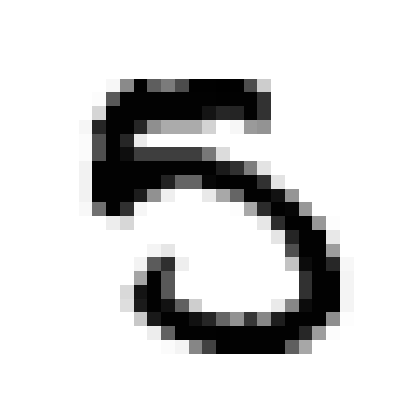

In [69]:
some_digit = X_test[rnm_fp_instance] #The value of the random fp instance
plt.figure(figsize=(5, 5))
plot_digit(some_digit)
plt.show()

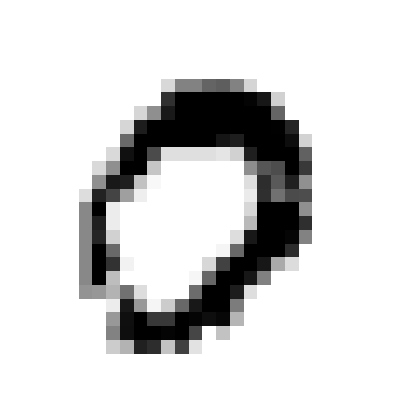

In [70]:
some_digit = X_test[rnm_fn_instance] #The value of the random fn instance
plt.figure(figsize=(5, 5))
plot_digit(some_digit)
plt.show()